In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Cleaned Data.csv',index_col= 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7013 entries, 0 to 16709
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7013 non-null   object 
 1   Platform         7013 non-null   object 
 2   Year_of_Release  6890 non-null   float64
 3   Genre            7013 non-null   object 
 4   Publisher        7009 non-null   object 
 5   NA_Sales         7013 non-null   float64
 6   EU_Sales         7013 non-null   float64
 7   JP_Sales         7013 non-null   float64
 8   Other_Sales      7013 non-null   float64
 9   Global_Sales     7013 non-null   float64
 10  Critic_Score     7013 non-null   float64
 11  Critic_Count     7013 non-null   float64
 12  User_Score       7013 non-null   float64
 13  User_Count       7013 non-null   float64
 14  Developer        7013 non-null   object 
 15  Rating           6947 non-null   object 
 16  New_User_Score   7013 non-null   int64  
dtypes: float64(10

## Classifying User_score as 1=top 20% and 0=rest

In [4]:
df['New_User_Score'] = np.where(df['User_Score'] >= 8,1,0)


In [5]:
print(df['New_User_Score'].unique())

[1 0]


## Decision Tree 

In [6]:
User_Score = pd.DataFrame(df['New_User_Score'])  # Response
Global_Sales = pd.DataFrame(df['Global_Sales'])      # Predictor

In [7]:
User_Score["New_User_Score"].value_counts()

0    4563
1    2450
Name: New_User_Score, dtype: int64

In [8]:
Global_Sales.describe()

,Global_Sales
count,7013.000000
mean,0.767403
std,1.940812
min,0.010000
25%,0.110000
50%,0.290000
75%,0.750000
max,82.530000


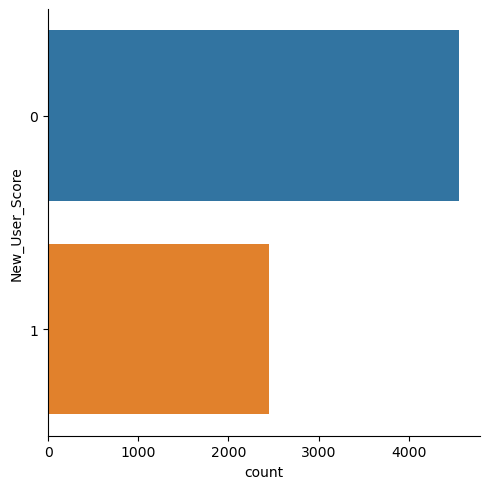

In [9]:
# Count Plot for Legendary Train
sb.catplot(y = "New_User_Score", data = User_Score, kind = "count")
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6547237076648841

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6493228795438346



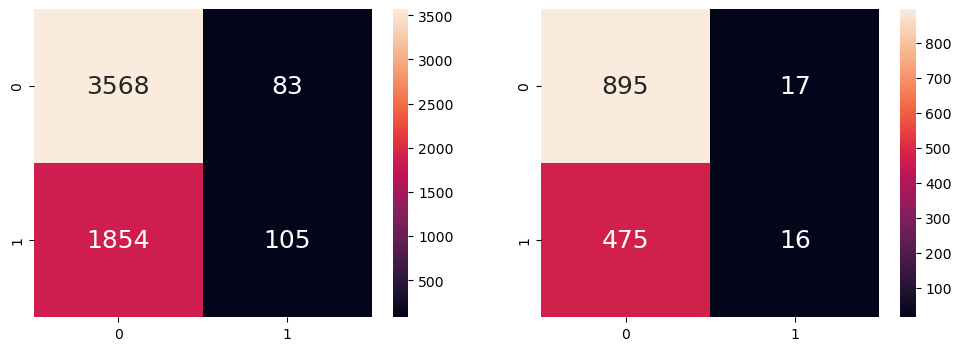

In [16]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Global_Sales, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

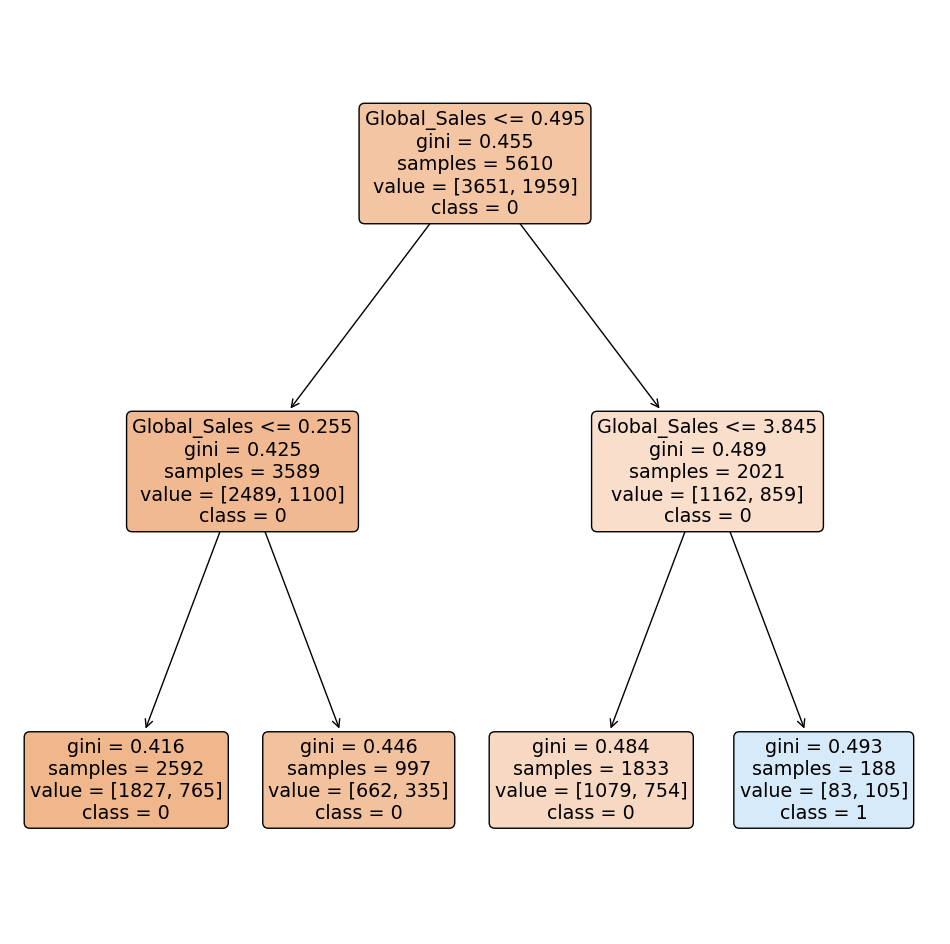

In [17]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Global_Sales"], 
          class_names=["0","1"])
plt.show()

## Multi-Variate Classification tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6980392156862745

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6828225231646472



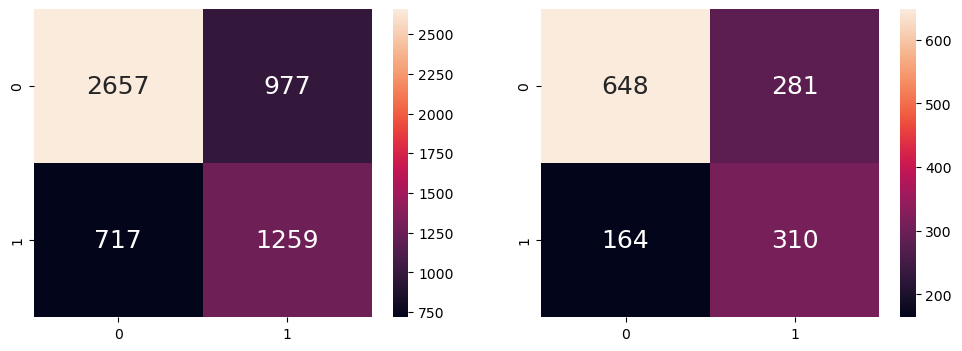

In [14]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(df['New_User_Score'])
X = pd.DataFrame(df[["NA_Sales", "EU_Sales", "Global_Sales", "Critic_Score", "Critic_Count", "User_Count"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

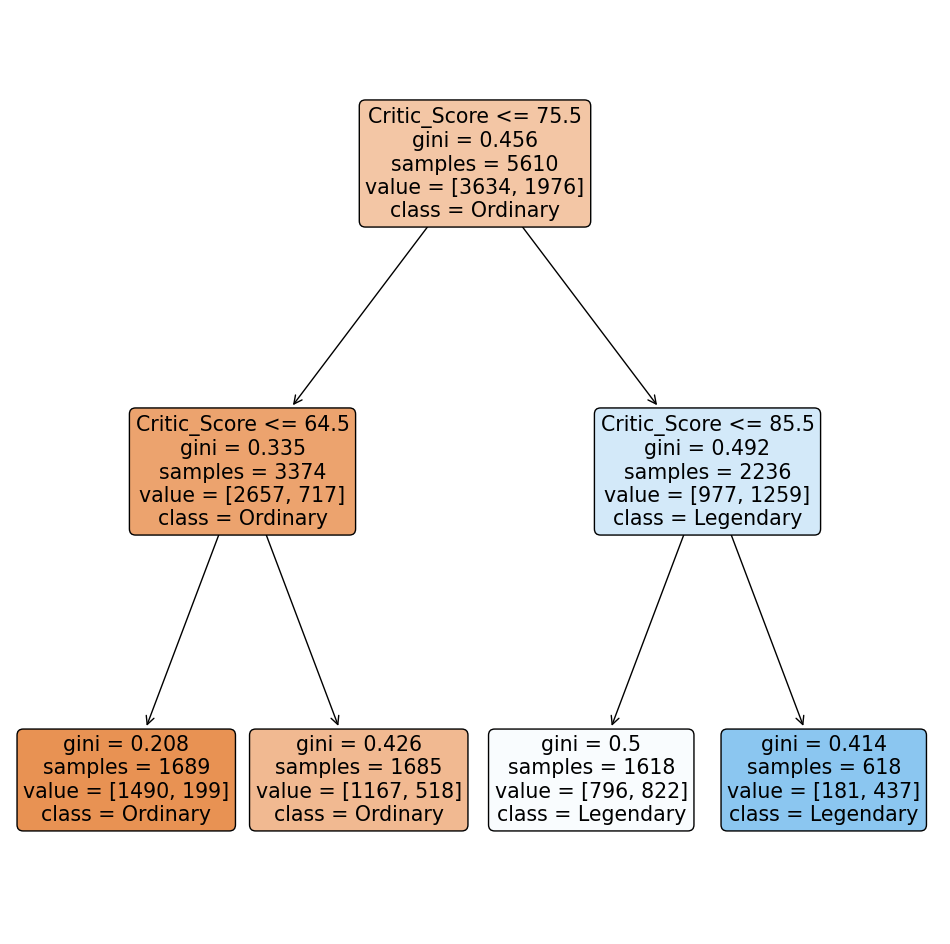

In [15]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Ordinary","Legendary"])
plt.show()

In [18]:
df.to_csv('Cleaned Data 2.csv')